In [ ]:
import numpy as np
import pandas as pd
pd.set_option('max_columns', None)

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LinearRegression
from xgboost import XGBRegressor

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
data = pd.read_csv('/content/drive/MyDrive/MACHINE LEARNING/Engineering_graduate_salary.csv')

In [ ]:
data
df1=data.copy()

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2998 entries, 0 to 2997
Data columns (total 34 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ID                     2998 non-null   int64  
 1   Gender                 2998 non-null   object 
 2   DOB                    2998 non-null   object 
 3   10percentage           2998 non-null   float64
 4   10board                2998 non-null   object 
 5   12graduation           2998 non-null   int64  
 6   12percentage           2998 non-null   float64
 7   12board                2998 non-null   object 
 8   CollegeID              2998 non-null   int64  
 9   CollegeTier            2998 non-null   int64  
 10  Degree                 2998 non-null   object 
 11  Specialization         2998 non-null   object 
 12  collegeGPA             2998 non-null   float64
 13  CollegeCityID          2998 non-null   int64  
 14  CollegeCityTier        2998 non-null   int64  
 15  Coll

#**ONE HOT ENCODING**

In [ ]:
def onehot_encode(df, column):
    df = df.copy()
    dummies = pd.get_dummies(df[column], prefix=column)
    df = pd.concat([df, dummies], axis=1)
    df = df.drop(column, axis=1)
    return df

# **PRE PROCESSING**

In [ ]:
def preprocess_inputs(df):
    df = df.copy()
    
    # Drop ID column
    #df = df.drop('ID', axis=1)
    
    # Binary encoding
    df['Gender'] = df['Gender'].replace({'f': 0, 'm': 1})
    
    # Date encoding
    df['DOB'] = pd.to_datetime(df['DOB'])
    df['DOB_year'] = df['DOB'].apply(lambda x: x.year)
    df['DOB_month'] = df['DOB'].apply(lambda x: x.month)
    df['DOB_day'] = df['DOB'].apply(lambda x: x.day)
    df = df.drop('DOB', axis=1)
    
    # One-hot encoding
    for column in ['10board', '12board', 'Degree', 'Specialization', 'CollegeState']:
        df = onehot_encode(df, column)
    
    # Encode and fill missing values
    df = df.replace(-1,0)
    
    
    # Split df into X and y
    y = df['Salary']
    X = df.drop('Salary', axis=1)
    
    # Train-test split
    X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, shuffle=True, random_state=1)
    
    # Scale X
    scaler = StandardScaler()
    scaler.fit(X_train)
    X_train = pd.DataFrame(scaler.transform(X_train), columns=X.columns)
    X_test = pd.DataFrame(scaler.transform(X_test), columns=X.columns)
    
    return X_train, X_test, y_train, y_test

In [ ]:
data=data.drop([

 'ID',
 '12graduation',
 'CollegeID',
 'CollegeTier',
 'CollegeCityID',
 'CollegeCityTier',
 'GraduationYear','conscientiousness','agreeableness','extraversion','nueroticism','10percentage','12percentage',
    'ComputerProgramming','ElectronicsAndSemicon','ComputerScience','MechanicalEngg','ElectricalEngg','TelecomEngg','CivilEngg'                
],axis=1)

In [ ]:
X_train, X_test, y_train, y_test = preprocess_inputs(data)

In [ ]:
X_train

,Gender,collegeGPA,English,Logical,Quant,Domain,openess_to_experience,DOB_year,DOB_month,DOB_day,10board_0,10board_aisse,10board_andhra pradesh board ssc,10board_andhra pradesh state board,10board_anglo indian,10board_ap state board,10board_ap state board for secondary education,10board_apsche,10board_apssc,10board_aurangabad board,10board_bharathi matriculation school,10board_bihar board,10board_bihar school examination board,10board_bihar school examination board patna,"10board_bihar secondary education board,patna",10board_biharboard,10board_board of secondary education,10board_board of high school and intermediate education uttarpradesh,10board_board of school education harayana,10board_board of secendary education orissa,10board_board of secondary education,10board_board of secondary education (bse) orissa,10board_board of secondary education - andhra pradesh,10board_board of secondary education orissa,10board_board of secondary education(bse) orissa,"10board_board of secondary education, andhra pradesh","10board_board of secondary education, rajasthan","10board_board of secondary education,andhara pradesh","10board_board of secondary education,andhra pradesh","10board_board of secondary education,ap",10board_board of secondary school education,10board_board of ssc education andhra pradesh,"10board_board ofsecondary education,ap",10board_board secondary education,"10board_bright way college, (up board)",10board_bse,"10board_bse, odisha","10board_bse,odisha","10board_bse,orissa",10board_bseb,10board_bseb patna,"10board_bseb, patna","10board_bseb,patna",10board_bsemp,10board_bsepatna,10board_cbsc,10board_cbse,10board_cbse,10board_cbse board,10board_central board of secondary education,"10board_central board of secondary education, new delhi",10board_certificate of middle years program of ib,10board_cgbse,10board_council for indian school certificate examination,"10board_dav public school,hehal",10board_delhi board,10board_delhi public school,10board_education board of kerala,10board_ghseb,10board_gseb,10board_gsheb,10board_gujarat board,10board_gujarat state board,10board_gyan bharati school,10board_haryana board of school education,10board_hbsc,10board_hbse,10board_himachal pradesh board,10board_himachal pradesh board of school education,10board_hsc,10board_hsce,10board_hse,"10board_hse,board","10board_hse,orissa",10board_icse,10board_icse board,"10board_icse board , new delhi",10board_j & k bord,10board_j&k state board of school education,10board_jawahar navodaya vidyalaya,"10board_jbse,jharkhand",10board_jharkhand academic council,10board_jharkhand acedemic council,10board_jharkhand secondary board,10board_jharkhand secondary education board,10board_jharkhand secondary examination board (ranchi),10board_jkbose,10board_jseb,10board_kalaimagal matriculation higher secondary school,10board_karnataka,10board_karnataka board,10board_karnataka board of higher education,10board_karnataka board of secondary education,10board_karnataka education board,10board_karnataka education board (keeb),10board_karnataka secondary education,10board_karnataka secondary education board,10board_karnataka secondary education examination board,10board_karnataka secondary eduction,10board_karnataka secondary school of examination,10board_karnataka secondory education board,10board_karnataka sslc board bangalore,10board_karnataka state board,10board_karnataka state education examination board,10board_karnataka state secondary education board,10board_kea,10board_kerala state board,10board_kerala state technical education,10board_kiran english medium high school,10board_kolhapur,10board_ksbe,10board_kseb,10board_kseeb,10board_kseeb(karnataka secondary education examination board),10board_ksseb,10board_ksseb(karnataka state board),10board_latur board,10board_little jacky matric higher secondary school,10board_madhya pradesh board,10board_maharashtra,10board_maharashtra board,"10board_maharashtra board, pune",10board_maharashtra nasik board,10board_mah

In [ ]:
y_train

2833     480000
1792     200000
957      325000
1385     290000
1307    2000000
         ...   
2763     700000
905      120000
1096     180000
235      310000
1061     300000
Name: Salary, Length: 2098, dtype: int64

# **LINEAR REGRESSION** (Less Accuracy)

In [ ]:
lin_model = LinearRegression()
lin_model.fit(X_train, y_train)

lin_r2 = lin_model.score(X_test, y_test)

print("Linear Regression R^2 Score: {:.5f}".format(lin_r2))

Linear Regression R^2 Score: -2531721415572909453784121344.00000


# **XGBOOST**


In [ ]:
xgb_model = XGBRegressor()
xgb_model.fit(X_train, y_train)

xgb_r2 = xgb_model.score(X_test, y_test)

print("XGBoost R^2 Score: {:.5f}".format(xgb_r2))

[11:03:54] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
XGBoost R^2 Score: 0.08528


# **CLASSIFICATION ALGORITHMS**

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

LR = LogisticRegression()
LR.fit(X_train , y_train)

ypred_train = LR.predict(X_train)
ypred_test = LR.predict(X_test)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [ ]:
from sklearn.metrics import plot_roc_curve , precision_score , confusion_matrix , classification_report , accuracy_score
print(accuracy_score(y_train , ypred_train)*100)
print(accuracy_score(y_test , ypred_test)*100)

43.56530028598665
5.333333333333334


# **DATA PREPROCESSING** (For Increasing Accuracy)

In [ ]:

df1= df1.replace({-1:np.nan , -1.0 : np.nan})

In [ ]:
df1['Domain'].fillna(df1['Domain'].mean(),inplace=True)
df1

,ID,Gender,DOB,10percentage,10board,12graduation,12percentage,12board,CollegeID,CollegeTier,Degree,Specialization,collegeGPA,CollegeCityID,CollegeCityTier,CollegeState,GraduationYear,English,Logical,Quant,Domain,ComputerProgramming,ElectronicsAndSemicon,ComputerScience,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience,Salary
0,604399.0,f,1990-10-22,87.80,cbse,2009.0,84.00,cbse,6920.0,1.0,B.Tech/B.E.,instrumentation and control engineering,73.82,6920.0,1.0,Delhi,2013.0,650.0,665.0,810.0,0.694479,485.0,366.0,NaN,NaN,NaN,NaN,NaN,-0.1590,0.3789,1.2396,0.14590,0.2889,445000.0
1,988334.0,m,1990-05-15,57.00,cbse,2010.0,64.50,cbse,6624.0,2.0,B.Tech/B.E.,computer science & engineering,65.00,6624.0,0.0,Uttar Pradesh,2014.0,440.0,435.0,210.0,0.342315,365.0,NaN,NaN,NaN,NaN,NaN,NaN,1.1336,0.0459,1.2396,0.52620,-0.2859,110000.0
2,301647.0,m,1989-08-21,77.33,"maharashtra state board,pune",2007.0,85.17,amravati divisional board,9084.0,2.0,B.Tech/B.E.,electronics & telecommunications,61.94,9084.0,0.0,Maharashtra,2011.0,485.0,475.0,505.0,0.824666,NaN,400.0,NaN,NaN,NaN,260.0,NaN,0.5100,-0.1232,1.5428,-0.29020,-0.2875,255000.0
3,582313.0,m,1991-05-04,84.30,cbse,2009.0,86.00,cbse,8195.0,1.0,B.Tech/B.E.,computer science & engineering,80.40,8195.0,1.0,Delhi,2013.0,675.0,620.0,635.0,0.990009,655.0,NaN,NaN,NaN,NaN,NaN,NaN,-0.4463,0.2124,0.3174,0.27270,0.4805,420000.0
4,339001.0,f,1990-10-30,82.00,cbse,2008.0,75.00,cbse,4889.0,2.0,B.Tech/B.E.,biotechnology,64.30,4889.0,1.0,Tamil Nadu,2012.0,575.0,495.0,365.0,0.278457,315.0,NaN,NaN,NaN,NaN,NaN,NaN,-1.4992,-0.7473,-1.0697,0.06223,0.1864,200000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2993,103174.0,f,1989-04-17,75.00,0,2005.0,73.00,0,1263.0,2.0,B.Tech/B.E.,electronics and communication engineering,70.00,1263.0,1.0,Tamil Nadu,2010.0,505.0,485.0,445.0,0.538387,245.0,333.0,NaN,NaN,NaN,NaN,NaN,-1.1901,0.9688,-1.0697,1.35490,0.0284,120000.0
2994,352811.0,f,1991-07-22,84.00,state board,2008.0,77.00,state board,9481.0,2.0,B.Tech/B.E.,information technology,75.20,9481.0,0.0,Tamil Nadu,2012.0,345.0,585.0,395.0,0.190153,315.0,NaN,NaN,NaN,NaN,NaN,NaN,-0.1082,0.0328,-0.4891,-0.29020,0.5024,120000.0
2995,287070.0,m,1988-11-24,91.40,bsemp,2006.0,65.56,bsemp,547.0,2.0,B.Tech/B.E.,information technology,73.19,547.0,0.0,Madhya Pradesh,2011.0,385.0,425.0,485.0,0.600057,435.0,NaN,NaN,NaN,NaN,NaN,NaN,-0.8810,0.1888,-0.3440,0.06230,0.6603,385000.0
2996,317336.0,m,1988-08-25,88.64,karnataka education board,2006.0,65.16,karnataka education board,1629.0,2.0,B.Tech/B.E.,computer engineering,74.81,1629.0,1.0,Karnataka,2011.0,465.0,645.0,505.0,0.901490,545.0,NaN,NaN,NaN,NaN,NaN,NaN,1.4374,1.2808,-0.4891,-1.46537,0.5419,530000.0


In [ ]:
df1['ComputerProgramming'].fillna(0 , inplace=True)
df1['ElectronicsAndSemicon'].fillna(0 , inplace=True)
df1['ComputerScience'].fillna(0 , inplace=True)
df1['MechanicalEngg'].fillna(0 , inplace=True)
df1['ElectricalEngg'].fillna(0 , inplace=True)
df1['TelecomEngg'].fillna(0 ,inplace=True)
df1['CivilEngg'].fillna(0 , inplace=True)

In [ ]:

df1 = df1.drop(['ID'],1)
data = df1.copy(deep=True)

In [ ]:
df1['Gender']=df1['Gender'].replace({'m':'M','f':'F'})

In [ ]:
df1['DOB']=pd.to_datetime(df1['DOB'])
df1['DOB'] = df1['DOB'].dt.strftime('%Y')

In [ ]:
df1['10board']=df1['10board'].replace(0,"N/A")
df1['10board']=df1['10board'].replace('icse board',"icse")
df1['10board']=df1['10board'].replace('cicse',"icse")
df1['10board']=df1['10board'].replace('icse board , new delhi',"icse")
df1['10board']=df1['10board'].replace('cbsc',"cbse")
df1['10board']=df1['10board'].replace('delhi public school',"cbse")
df1['10board']=df1['10board'].replace('cbse board',"cbse")
df1['10board']=df1['10board'].replace('cbse ',"cbse")
df1['10board']=df1['10board'].replace('delhi board',"cbse")

In [ ]:
df1['10board']=df1['10board'].fillna(method='ffill')

In [ ]:
list1 = list(df1['10board'].value_counts().index)
list1.remove('icse')
list1.remove('cbse')
list1


['state board',
 '0',
 'ssc',
 'up board',
 'matriculation',
 'rbse',
 'board of secondary education',
 'up',
 'wbbse',
 'sslc',
 'kseeb',
 'mp board',
 'upboard',
 'maharashtra state board',
 'central board of secondary education',
 'karnataka state board',
 'maharashtra board',
 'pseb',
 'bseb',
 'rajasthan board',
 'state',
 'bse',
 'hbse',
 'karnataka secondary education examination board',
 'west bengal board of secondary education',
 'karnataka secondary education board',
 'uttar pradesh board',
 'bihar board',
 'secondary school of education',
 'uttarakhand board',
 'gseb',
 'u p board',
 'stateboard',
 'matriculation board',
 'anglo indian',
 'bseb,patna',
 'pune',
 'bihar school examination board',
 'board of secondary education,andhra pradesh',
 'hbsc',
 'kerala state board',
 'board of school education harayana',
 'kseb',
 'maharashtra',
 'bseb, patna',
 'bse, odisha',
 'karnataka board',
 'nagpur',
 'mpbse',
 'mpboard',
 'mp',
 'rajasthan board of secondary education',
 'bs

In [ ]:

for i in range(df1.shape[0]):
    if df1['10board'][i] in list1:
        df1['10board'][i]='State Board'

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [ ]:
df1['10board']=df1['10board'].replace('cbse','CBSE')
df1['10board']=df1['10board'].replace('icse','ICSE')

In [ ]:
df1['12board']=df1['12board'].replace('council for indian school certificate examination','ISC')
df1['12board']=df1['12board'].replace('cbsc','CBSE')
df1['12board']=df1['12board'].replace('cbse,new delhi','CBSE')
df1['12board']=df1['12board'].replace('cbse','CBSE')
df1['12board']=df1['12board'].replace('icse','ISC')
df1['12board']=df1['12board'].replace('isc','ISC')
df1['12board']=df1['12board'].replace(0,'N/A')
df1['12board']=df1['12board'].replace('central board of secondary education','CBSE')
df1['12board']=df1['12board'].replace('isc board , new delhi','ISC')
df1['12board']=df1['12board'].replace('cbese','CBSE')
df1['12board']=df1['12board'].replace('isc board','ISC')
df1['12board']=df1['12board'].replace('cicse','ISC')
df1['12board']=df1['12board'].replace('isce','ISC')

In [ ]:

df1['12board']=df1['12board'].fillna(method='ffill')

In [ ]:
list2 = list(df1['12board'].value_counts().index)
list2.remove('ISC')
list2.remove('CBSE')
list2

['state board',
 '0',
 'up board',
 'board of intermediate',
 'board of intermediate education',
 'rbse',
 'up',
 'mp board',
 'chse',
 'bie',
 'maharashtra board',
 'ipe',
 'maharashtra state board',
 'hsc',
 'wbchse',
 'hbse',
 'pu board',
 'puc',
 'ssc',
 'intermediate',
 'upboard',
 'matriculation',
 'bseb',
 'msbte',
 'state',
 'stateboard',
 'uttar pradesh board',
 'rajasthan board',
 'karnataka state board',
 'west bengal council of higher secondary education',
 'pseb',
 'nios',
 'bieap',
 'board of intermediate education,ap',
 'board of intermediate education, ap',
 'uttarakhand board',
 'pre-university',
 'u p board',
 'karnataka pu board',
 'chse,orissa',
 'sbtet',
 'bihar intermediate education council',
 'jharkhand academic council',
 'intermediate board',
 'department of pre-university education',
 'nagpur',
 'bte up',
 'wbbhse',
 'maharashtra',
 'karnataka board',
 'kerala state board',
 'biec,patna',
 'mpbse',
 'board of intermediate ap',
 'karnataka pre university board

In [ ]:
for i in range(df1.shape[0]):
    if df1['12board'][i] in list2:
        df1['12board'][i]='State Board'

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
df1['Specialization']=df1['Specialization'].replace({'electronics and communication engineering':'electronics engineering', 
                                 'information technology':'computer science & engineering',
                                 'computer engineering':'computer science & engineering', 
                                 'computer application':'computer science & engineering', 
                                 'electronics and electrical engineering':'electronics engineering',
                                 'electronics & telecommunications':'electronics engineering', 
                                 'electrical engineering':'electronics engineering',
                                 'electronics & instrumentation eng':'electronics engineering', 
                                 'electronics and instrumentation engineering':'electronics engineering',
                                 'information science engineering':'other',
                                 'instrumentation and control engineering':'other', 
                                 'electronics engineering':'electronics engineering',
                                 'biotechnology':'medical engineering', 
                                 'industrial & production engineering':'civil engineering',
                                 'chemical engineering':'medical engineering', 
                                 'applied electronics and instrumentation':'electronics engineering',
                                 'computer science and technology':'computer science & engineering', 
                                 'telecommunication engineering':'electronics engineering',
                                 'mechanical and automation':'mechanical engineering', 
                                 'automobile/automotive engineering':'mechanical engineering',
                                 'instrumentation engineering':'electronics engineering', 
                                 'mechatronics':'other',
                                 'electronics and computer engineering':'electronics engineering', 
                                 'aeronautical engineering':'other',
                                 'metallurgical engineering':'other', 
                                 'information & communication technology':'electronics engineering',
                                 'computer science':'computer science & engineering', 
                                 'industrial engineering':'civil engineering', 
                                 'biomedical engineering':'medical engineering',
                                 'electrical and power engineering':'electronics engineering', 
                                 'information science':'other',
                                 'polymer technology':'other', 
                                 'mechanical & production engineering':'mechanical engineering',
                                 'industrial & management engineering':'civil engineering', 
                                 'internal combustion engine':'mechanical engineering', 
                                 'computer networking':'computer science & engineering',
                                 'computer and communication engineering':'computer science & engineering',
                                 'power systems and automation':'electronics engineering',
                                 'control and instrumentation engineering':'other',
                                 'embedded systems technology':'other', 
                                 'ceramic engineering':'other',
                                 'application developer':'computer science & engineering',
                                 'electronics':'electronics engineering'})

In [ ]:

df1['collegeGPA']=round(df1['collegeGPA']/10 , ndigits=2)

In [ ]:
df1.loc[2664,'GraduationYear'] = 2014


In [ ]:

num_data = df1.select_dtypes(include = np.number)
cat_data = df1.select_dtypes(exclude=np.number)

In [ ]:
optional = ['ComputerProgramming', 'ElectronicsAndSemicon', 'ComputerScience',
            'MechanicalEngg', 'ElectricalEngg', 'TelecomEngg', 'CivilEngg']
df_optional = df1[optional]
df_optional

,ComputerProgramming,ElectronicsAndSemicon,ComputerScience,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg
0,485.0,366.0,0.0,0.0,0.0,0.0,0.0
1,365.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,400.0,0.0,0.0,0.0,260.0,0.0
3,655.0,0.0,0.0,0.0,0.0,0.0,0.0
4,315.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...
2993,245.0,333.0,0.0,0.0,0.0,0.0,0.0
2994,315.0,0.0,0.0,0.0,0.0,0.0,0.0
2995,435.0,0.0,0.0,0.0,0.0,0.0,0.0
2996,545.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
l=[]
for i in range(len(df1)):
    c=0
    for j in optional:
        if df_optional.loc[i,j]!=0:
            c=c+1
        else:
            pass
    l.append(c)

In [ ]:
df_optional['Count'] = l

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
df_optional['optional_marks']=(df_optional['ComputerProgramming']+df_optional['ElectronicsAndSemicon']+df_optional['ComputerScience']
+df_optional['MechanicalEngg']+df_optional['ElectricalEngg']+df_optional['TelecomEngg']+df_optional['CivilEngg'])/df_optional['Count']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
df2 = df1.copy(deep=True)

In [ ]:

df2['Number_Of_Optional_Subjects'] = df_optional['Count']
df2['Optional_Marks'] = df_optional['optional_marks']

In [ ]:

salary = df2['Salary']

In [ ]:
Salary_Class = []
for i in df2['Salary']:
    if i>300000:
        Salary_Class.append(1)
    else:
        Salary_Class.append(0)

In [ ]:
df2['Optional_Marks'].fillna(0 , inplace=True)

In [ ]:
df2['Age'] = 2018 - df1['DOB'].astype('int64')

In [ ]:

df2.drop(['CollegeID','CollegeCityID'],1 , inplace=True)


In [ ]:
df2.columns

Index(['Gender', 'DOB', '10percentage', '10board', '12graduation',
       '12percentage', '12board', 'CollegeTier', 'Degree', 'Specialization',
       'collegeGPA', 'CollegeCityTier', 'CollegeState', 'GraduationYear',
       'English', 'Logical', 'Quant', 'Domain', 'ComputerProgramming',
       'ElectronicsAndSemicon', 'ComputerScience', 'MechanicalEngg',
       'ElectricalEngg', 'TelecomEngg', 'CivilEngg', 'conscientiousness',
       'agreeableness', 'extraversion', 'nueroticism', 'openess_to_experience',
       'Salary', 'Number_Of_Optional_Subjects', 'Optional_Marks', 'Age'],
      dtype='object')

# **Creating Salary Class**

In [ ]:
df2['Salary_Class'] = Salary_Class

In [ ]:
df2 = df2.drop(['DOB'],1)

In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2998 entries, 0 to 2997
Data columns (total 34 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Gender                       2998 non-null   object 
 1   10percentage                 2998 non-null   float64
 2   10board                      2998 non-null   object 
 3   12graduation                 2998 non-null   float64
 4   12percentage                 2998 non-null   float64
 5   12board                      2998 non-null   object 
 6   CollegeTier                  2998 non-null   float64
 7   Degree                       2998 non-null   object 
 8   Specialization               2998 non-null   object 
 9   collegeGPA                   2998 non-null   float64
 10  CollegeCityTier              2998 non-null   float64
 11  CollegeState                 2998 non-null   object 
 12  GraduationYear               2998 non-null   float64
 13  English           

In [ ]:

df2['CollegeCityTier'] = df2['CollegeCityTier'].astype('object')
df2['CollegeTier'] = df2['CollegeTier'].astype('object')

In [ ]:
df2['12graduation'] = df2['12graduation'].astype('int64')
df2['GraduationYear'] = df2['GraduationYear'].astype('int64')

In [ ]:
cat_data = df2.select_dtypes(exclude = np.number)
num_data = df2.select_dtypes(include=np.number)

In [ ]:
cat_data

,Gender,10board,12board,CollegeTier,Degree,Specialization,CollegeCityTier,CollegeState
0,F,CBSE,CBSE,1,B.Tech/B.E.,other,1,Delhi
1,M,CBSE,CBSE,2,B.Tech/B.E.,computer science & engineering,0,Uttar Pradesh
2,M,State Board,State Board,2,B.Tech/B.E.,electronics engineering,0,Maharashtra
3,M,CBSE,CBSE,1,B.Tech/B.E.,computer science & engineering,1,Delhi
4,F,CBSE,CBSE,2,B.Tech/B.E.,medical engineering,1,Tamil Nadu
...,...,...,...,...,...,...,...,...
2993,F,State Board,State Board,2,B.Tech/B.E.,electronics engineering,1,Tamil Nadu
2994,F,State Board,State Board,2,B.Tech/B.E.,computer science & engineering,0,Tamil Nadu
2995,M,State Board,State Board,2,B.Tech/B.E.,computer science & engineering,0,Madhya Pradesh
2996,M,State Board,State Board,2,B.Tech/B.E.,computer science & engineering,1,Karnataka


In [ ]:

cat_data = cat_data.drop(['CollegeState'],1)

In [ ]:
cat_data

,Gender,10board,12board,CollegeTier,Degree,Specialization,CollegeCityTier
0,F,CBSE,CBSE,1,B.Tech/B.E.,other,1
1,M,CBSE,CBSE,2,B.Tech/B.E.,computer science & engineering,0
2,M,State Board,State Board,2,B.Tech/B.E.,electronics engineering,0
3,M,CBSE,CBSE,1,B.Tech/B.E.,computer science & engineering,1
4,F,CBSE,CBSE,2,B.Tech/B.E.,medical engineering,1
...,...,...,...,...,...,...,...
2993,F,State Board,State Board,2,B.Tech/B.E.,electronics engineering,1
2994,F,State Board,State Board,2,B.Tech/B.E.,computer science & engineering,0
2995,M,State Board,State Board,2,B.Tech/B.E.,computer science & engineering,0
2996,M,State Board,State Board,2,B.Tech/B.E.,computer science & engineering,1


In [ ]:
cat_data_final = pd.get_dummies(cat_data)

In [ ]:

num_data

,10percentage,12graduation,12percentage,collegeGPA,GraduationYear,English,Logical,Quant,Domain,ComputerProgramming,ElectronicsAndSemicon,ComputerScience,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience,Salary,Number_Of_Optional_Subjects,Optional_Marks,Age,Salary_Class
0,87.80,2009,84.00,7.38,2013,650.0,665.0,810.0,0.694479,485.0,366.0,0.0,0.0,0.0,0.0,0.0,-0.1590,0.3789,1.2396,0.14590,0.2889,445000.0,2,425.5,28,1
1,57.00,2010,64.50,6.50,2014,440.0,435.0,210.0,0.342315,365.0,0.0,0.0,0.0,0.0,0.0,0.0,1.1336,0.0459,1.2396,0.52620,-0.2859,110000.0,1,365.0,28,0
2,77.33,2007,85.17,6.19,2011,485.0,475.0,505.0,0.824666,0.0,400.0,0.0,0.0,0.0,260.0,0.0,0.5100,-0.1232,1.5428,-0.29020,-0.2875,255000.0,2,330.0,29,0
3,84.30,2009,86.00,8.04,2013,675.0,620.0,635.0,0.990009,655.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.4463,0.2124,0.3174,0.27270,0.4805,420000.0,1,655.0,27,1
4,82.00,2008,75.00,6.43,2012,575.0,495.0,365.0,0.278457,315.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.4992,-0.7473,-1.0697,0.06223,0.1864,200000.0,1,315.0,28,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2993,75.00,2005,73.00,7.00,2010,505.0,485.0,445.0,0.538387,245.0,333.0,0.0,0.0,0.0,0.0,0.0,-1.1901,0.9688,-1.0697,1.35490,0.0284,120000.0,2,289.0,29,0
2994,84.00,2008,77.00,7.52,2012,345.0,585.0,395.0,0.190153,315.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.1082,0.0328,-0.4891,-0.29020,0.5024,120000.0,1,315.0,27,0
2995,91.40,2006,65.56,7.32,2011,385.0,425.0,485.0,0.600057,435.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.8810,0.1888,-0.3440,0.06230,0.6603,385000.0,1,435.0,30,1
2996,88.64,2006,65.16,7.48,2011,465.0,645.0,505.0,0.901490,545.0,0.0,0.0,0.0,0.0,0.0,0.0,1.4374,1.2808,-0.4891,-1.46537,0.5419,530000.0,1,545.0,30,1


In [ ]:
num_data_noclass = num_data.drop('Salary_Class',1)

In [ ]:
scaled_scores = num_data_noclass[['Domain','conscientiousness','agreeableness','extraversion','nueroticism','openess_to_experience']]

In [ ]:

num_data_noclass = num_data_noclass.drop(scaled_scores,1)

In [ ]:
num_data_noclass

,10percentage,12graduation,12percentage,collegeGPA,GraduationYear,English,Logical,Quant,ComputerProgramming,ElectronicsAndSemicon,ComputerScience,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,Salary,Number_Of_Optional_Subjects,Optional_Marks,Age
0,87.80,2009,84.00,7.38,2013,650.0,665.0,810.0,485.0,366.0,0.0,0.0,0.0,0.0,0.0,445000.0,2,425.5,28
1,57.00,2010,64.50,6.50,2014,440.0,435.0,210.0,365.0,0.0,0.0,0.0,0.0,0.0,0.0,110000.0,1,365.0,28
2,77.33,2007,85.17,6.19,2011,485.0,475.0,505.0,0.0,400.0,0.0,0.0,0.0,260.0,0.0,255000.0,2,330.0,29
3,84.30,2009,86.00,8.04,2013,675.0,620.0,635.0,655.0,0.0,0.0,0.0,0.0,0.0,0.0,420000.0,1,655.0,27
4,82.00,2008,75.00,6.43,2012,575.0,495.0,365.0,315.0,0.0,0.0,0.0,0.0,0.0,0.0,200000.0,1,315.0,28
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2993,75.00,2005,73.00,7.00,2010,505.0,485.0,445.0,245.0,333.0,0.0,0.0,0.0,0.0,0.0,120000.0,2,289.0,29
2994,84.00,2008,77.00,7.52,2012,345.0,585.0,395.0,315.0,0.0,0.0,0.0,0.0,0.0,0.0,120000.0,1,315.0,27
2995,91.40,2006,65.56,7.32,2011,385.0,425.0,485.0,435.0,0.0,0.0,0.0,0.0,0.0,0.0,385000.0,1,435.0,30
2996,88.64,2006,65.16,7.48,2011,465.0,645.0,505.0,545.0,0.0,0.0,0.0,0.0,0.0,0.0,530000.0,1,545.0,30


In [ ]:
num_data_noclass = num_data_noclass.drop(optional,1)

In [ ]:

num_data_noclass

,10percentage,12graduation,12percentage,collegeGPA,GraduationYear,English,Logical,Quant,Salary,Number_Of_Optional_Subjects,Optional_Marks,Age
0,87.80,2009,84.00,7.38,2013,650.0,665.0,810.0,445000.0,2,425.5,28
1,57.00,2010,64.50,6.50,2014,440.0,435.0,210.0,110000.0,1,365.0,28
2,77.33,2007,85.17,6.19,2011,485.0,475.0,505.0,255000.0,2,330.0,29
3,84.30,2009,86.00,8.04,2013,675.0,620.0,635.0,420000.0,1,655.0,27
4,82.00,2008,75.00,6.43,2012,575.0,495.0,365.0,200000.0,1,315.0,28
...,...,...,...,...,...,...,...,...,...,...,...,...
2993,75.00,2005,73.00,7.00,2010,505.0,485.0,445.0,120000.0,2,289.0,29
2994,84.00,2008,77.00,7.52,2012,345.0,585.0,395.0,120000.0,1,315.0,27
2995,91.40,2006,65.56,7.32,2011,385.0,425.0,485.0,385000.0,1,435.0,30
2996,88.64,2006,65.16,7.48,2011,465.0,645.0,505.0,530000.0,1,545.0,30


# **SCALING**

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
num_scaled = pd.DataFrame(sc.fit_transform(num_data_noclass),columns = num_data_noclass.columns)

In [ ]:
x_sc1 = pd.concat((cat_data_final,num_scaled,scaled_scores),1)
x_sc1.head()

,Gender_F,Gender_M,10board_CBSE,10board_ICSE,10board_State Board,12board_CBSE,12board_ISC,12board_State Board,CollegeTier_1.0,CollegeTier_2.0,Degree_B.Tech/B.E.,Degree_M.Sc. (Tech.),Degree_M.Tech./M.E.,Degree_MCA,Specialization_civil engineering,Specialization_computer science & engineering,Specialization_electronics engineering,Specialization_mechanical engineering,Specialization_medical engineering,Specialization_other,CollegeCityTier_0.0,CollegeCityTier_1.0,10percentage,12graduation,12percentage,collegeGPA,GraduationYear,English,Logical,Quant,Salary,Number_Of_Optional_Subjects,Optional_Marks,Age,Domain,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience
0,1,0,1,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,1,1.013260,0.563442,0.868731,0.281981,0.028825,1.414550,1.885408,2.421635,0.658634,0.738366,0.143762,0.243623,0.694479,-0.1590,0.3789,1.2396,0.14590,0.2889
1,0,1,1,0,0,1,0,0,0,1,1,0,0,0,0,1,0,0,0,0,1,0,-2.066396,1.176359,-0.885111,-0.801570,0.056018,-0.580000,-0.749629,-2.489370,-0.919353,-0.763412,-0.367674,0.243623,0.342315,1.1336,0.0459,1.2396,0.52620,-0.2859
2,0,1,0,0,1,0,0,1,0,1,1,0,0,0,0,0,1,0,0,0,1,0,-0.033623,-0.662392,0.973962,-1.183276,-0.025560,-0.152596,-0.291362,-0.074793,-0.236344,0.738366,-0.663546,0.814679,0.824666,0.5100,-0.1232,1.5428,-0.29020,-0.2875
3,0,1,1,0,0,1,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,0.663300,0.563442,1.048612,1.094645,0.028825,1.651996,1.369857,0.989259,0.540874,-0.763412,2.083838,-0.327433,0.990009,-0.4463,0.2124,0.3174,0.27270,0.4805
4,1,0,1,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,1,0.433325,-0.049475,0.059265,-0.887762,0.001633,0.702211,-0.062228,-1.220694,-0.495416,-0.763412,-0.790349,0.243623,0.278457,-1.4992,-0.7473,-1.0697,0.06223,0.1864


In [ ]:
y = Salary_Class

In [ ]:
x_sc1

,Gender_F,Gender_M,10board_CBSE,10board_ICSE,10board_State Board,12board_CBSE,12board_ISC,12board_State Board,CollegeTier_1.0,CollegeTier_2.0,Degree_B.Tech/B.E.,Degree_M.Sc. (Tech.),Degree_M.Tech./M.E.,Degree_MCA,Specialization_civil engineering,Specialization_computer science & engineering,Specialization_electronics engineering,Specialization_mechanical engineering,Specialization_medical engineering,Specialization_other,CollegeCityTier_0.0,CollegeCityTier_1.0,10percentage,12graduation,12percentage,collegeGPA,GraduationYear,English,Logical,Quant,Salary,Number_Of_Optional_Subjects,Optional_Marks,Age,Domain,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience
0,1,0,1,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,1,1.013260,0.563442,0.868731,0.281981,0.028825,1.414550,1.885408,2.421635,0.658634,0.738366,0.143762,0.243623,0.694479,-0.1590,0.3789,1.2396,0.14590,0.2889
1,0,1,1,0,0,1,0,0,0,1,1,0,0,0,0,1,0,0,0,0,1,0,-2.066396,1.176359,-0.885111,-0.801570,0.056018,-0.580000,-0.749629,-2.489370,-0.919353,-0.763412,-0.367674,0.243623,0.342315,1.1336,0.0459,1.2396,0.52620,-0.2859
2,0,1,0,0,1,0,0,1,0,1,1,0,0,0,0,0,1,0,0,0,1,0,-0.033623,-0.662392,0.973962,-1.183276,-0.025560,-0.152596,-0.291362,-0.074793,-0.236344,0.738366,-0.663546,0.814679,0.824666,0.5100,-0.1232,1.5428,-0.29020,-0.2875
3,0,1,1,0,0,1,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,0.663300,0.563442,1.048612,1.094645,0.028825,1.651996,1.369857,0.989259,0.540874,-0.763412,2.083838,-0.327433,0.990009,-0.4463,0.2124,0.3174,0.27270,0.4805
4,1,0,1,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,1,0.433325,-0.049475,0.059265,-0.887762,0.001633,0.702211,-0.062228,-1.220694,-0.495416,-0.763412,-0.790349,0.243623,0.278457,-1.4992,-0.7473,-1.0697,0.06223,0.1864
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2993,1,0,0,0,1,0,0,1,0,1,1,0,0,0,0,0,1,0,0,0,0,1,-0.266597,-1.888226,-0.120616,-0.185916,-0.052753,0.037361,-0.176795,-0.565893,-0.872249,0.738366,-1.010139,0.814679,0.538387,-1.1901,0.9688,-1.0697,1.35490,0.0284
2994,1,0,0,0,1,0,0,1,0,1,1,0,0,0,0,1,0,0,0,0,1,0,0.633303,-0.049475,0.239147,0.454364,0.001633,-1.482296,0.968873,-0.975144,-0.872249,-0.763412,-0.790349,-0.327433,0.190153,-0.1082,0.0328,-0.4891,-0.29020,0.5024
2995,0,1,0,0,1,0,0,1,0,1,1,0,0,0,0,1,0,0,0,0,1,0,1.373220,-1.275309,-0.789774,0.208103,-0.025560,-1.102381,-0.864196,-0.238493,0.376009,-0.763412,0.224070,1.385735,0.600057,-0.8810,0.1888,-0.3440,0.06230,0.6603
2996,0,1,0,0,1,0,0,1,0,1,1,0,0,0,0,1,0,0,0,0,0,1,1.097251,-1.275309,-0.825750,0.405112,-0.025560,-0.342553,1.656274,-0.074793,1.059019,-0.763412,1.153954,1.385735,0.901490,1.4374,1.2808,-0.4891,-1.46537,0.5419


In [ ]:
x_sc2 = pd.DataFrame(sc.fit_transform(x_sc1), columns = x_sc1.columns)

In [ ]:
x_sc2

,Gender_F,Gender_M,10board_CBSE,10board_ICSE,10board_State Board,12board_CBSE,12board_ISC,12board_State Board,CollegeTier_1.0,CollegeTier_2.0,Degree_B.Tech/B.E.,Degree_M.Sc. (Tech.),Degree_M.Tech./M.E.,Degree_MCA,Specialization_civil engineering,Specialization_computer science & engineering,Specialization_electronics engineering,Specialization_mechanical engineering,Specialization_medical engineering,Specialization_other,CollegeCityTier_0.0,CollegeCityTier_1.0,10percentage,12graduation,12percentage,collegeGPA,GraduationYear,English,Logical,Quant,Salary,Number_Of_Optional_Subjects,Optional_Marks,Age,Domain,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience
0,1.785259,-1.785259,1.380231,-0.277947,-1.184977,1.366073,-0.215458,-1.242108,3.502212,-3.502212,0.295658,-0.018267,-0.116287,-0.267357,-0.093532,-1.132837,-0.730413,-0.241334,-0.083989,7.119667,-1.541469,1.541469,1.013260,0.563442,0.868731,0.281981,0.028825,1.414550,1.885408,2.421635,0.658634,0.738366,0.143762,0.243623,0.340685,-0.117375,0.264404,1.296849,0.288196,0.427036
1,-0.560143,0.560143,1.380231,-0.277947,-1.184977,1.366073,-0.215458,-1.242108,-0.285534,0.285534,0.295658,-0.018267,-0.116287,-0.267357,-0.093532,0.882739,-0.730413,-0.241334,-0.083989,-0.140456,0.648732,-0.648732,-2.066396,1.176359,-0.885111,-0.801570,0.056018,-0.580000,-0.749629,-2.489370,-0.919353,-0.763412,-0.367674,0.243623,-0.988875,1.143941,-0.084042,1.296849,0.663714,-0.143787
2,-0.560143,0.560143,-0.724516,-0.277947,0.843898,-0.732025,-0.215458,0.805083,-0.285534,0.285534,0.295658,-0.018267,-0.116287,-0.267357,-0.093532,-1.132837,1.369088,-0.241334,-0.083989,-0.140456,0.648732,-0.648732,-0.033623,-0.662392,0.973962,-1.183276,-0.025560,-0.152596,-0.291362,-0.074793,-0.236344,0.738366,-0.663546,0.814679,0.832193,0.535434,-0.260986,1.611850,-0.142422,-0.145376
3,-0.560143,0.560143,1.380231,-0.277947,-1.184977,1.366073,-0.215458,-1.242108,3.502212,-3.502212,0.295658,-0.018267,-0.116287,-0.267357,-0.093532,0.882739,-0.730413,-0.241334,-0.083989,-0.140456,-1.541469,1.541469,0.663300,0.563442,1.048612,1.094645,0.028825,1.651996,1.369857,0.989259,0.540874,-0.763412,2.083838,-0.327433,1.456425,-0.397721,0.090181,0.338753,0.413401,0.617311
4,1.785259,-1.785259,1.380231,-0.277947,-1.184977,1.366073,-0.215458,-1.242108,-0.285534,0.285534,0.295658,-0.018267,-0.116287,-0.267357,-0.093532,-1.132837,-0.730413,-0.241334,11.906381,-0.140456,-1.541469,1.541469,0.433325,-0.049475,0.059265,-0.887762,0.001633,0.702211,-0.062228,-1.220694,-0.495416,-0.763412,-0.790349,0.243623,-1.229963,-1.425138,-0.914035,-1.102338,0.205578,0.325245
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2993,1.785259,-1.785259,-0.724516,-0.277947,0.843898,-0.732025,-0.215458,0.805083,-0.285534,0.285534,0.295658,-0.018267,-0.116287,-0.267357,-0.093532,-1.132837,1.369088,-0.241334,-0.083989,-0.140456,-1.541469,1.541469,-0.266597,-1.888226,-0.120616,-0.185916,-0.052753,0.037361,-0.176795,-0.565893,-0.872249,0.738366,-1.010139,0.814679,-0.248626,-1.123519,0.881666,-1.102338,1.481996,0.168339
2994,1.785259,-1.785259,-0.724516,-0.277947,0.843898,-0.732025,-0.215458,0.805083,-0.285534,0.285534,0.295658,-0.018267,-0.116287,-0.267357,-0.093532,0.882739,-0.730413,-0.241334,-0.083989,-0.140456,0.648732,-0.648732,0.633303,-0.049475,0.239147,0.454364,0.001633,-1.482296,0.968873,-0.975144,-0.872249,-0.763412,-0.790349,-0.327433,-1.563345,-0.067804,-0.097750,-0.499139,-0.142422,0.639059
2995,-0.560143,0.560143,-0.724516,-0.277947,0.843898,-0.732025,-0.215458,0.805083,-0.285534,0.285534,0.295658,-0.018267,-0.116287,-0.267357,-0.093532,0.882739,-0.730413,-0.241334,-0.083989,-0.140456,0.648732,-0.648732,1.373220,-1.275309,-0.789774,0.208103,-0.025560,-1.102381,-0.864196,-0.238493,0.376009,-0.763412,0.224070,1.385735,-0.015796,-0.821901,0.065486,-0.348391,0.205647,0.795867
2996,-0.560143,0.560143,-0.724516,-0.277947,0

In [ ]:
f_all  = x_sc1.drop('Salary',1)
f_test  = x_sc1.drop(['Degree_M.Sc. (Tech.)', 'Degree_M.Tech./M.E.','Specialization_computer science & engineering',
       'Specialization_electronics engineering',
       'Specialization_mechanical engineering',
       'Specialization_medical engineering', 'Specialization_other','extraversion','openess_to_experience','Salary'],1)

In [ ]:

f_test.columns

Index(['Gender_F', 'Gender_M', '10board_CBSE', '10board_ICSE',
       '10board_State Board', '12board_CBSE', '12board_ISC',
       '12board_State Board', 'CollegeTier_1.0', 'CollegeTier_2.0',
       'Degree_B.Tech/B.E.', 'Degree_MCA', 'Specialization_civil engineering',
       'CollegeCityTier_0.0', 'CollegeCityTier_1.0', '10percentage',
       '12graduation', '12percentage', 'collegeGPA', 'GraduationYear',
       'English', 'Logical', 'Quant', 'Number_Of_Optional_Subjects',
       'Optional_Marks', 'Age', 'Domain', 'conscientiousness', 'agreeableness',
       'nueroticism'],
      dtype='object')

In [ ]:
y = pd.Series(Salary_Class , name = 'Salary_Class')

In [ ]:

full_data = pd.concat((f_all,y),1)
full_data.head()

,Gender_F,Gender_M,10board_CBSE,10board_ICSE,10board_State Board,12board_CBSE,12board_ISC,12board_State Board,CollegeTier_1.0,CollegeTier_2.0,Degree_B.Tech/B.E.,Degree_M.Sc. (Tech.),Degree_M.Tech./M.E.,Degree_MCA,Specialization_civil engineering,Specialization_computer science & engineering,Specialization_electronics engineering,Specialization_mechanical engineering,Specialization_medical engineering,Specialization_other,CollegeCityTier_0.0,CollegeCityTier_1.0,10percentage,12graduation,12percentage,collegeGPA,GraduationYear,English,Logical,Quant,Number_Of_Optional_Subjects,Optional_Marks,Age,Domain,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience,Salary_Class
0,1,0,1,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,1,1.013260,0.563442,0.868731,0.281981,0.028825,1.414550,1.885408,2.421635,0.738366,0.143762,0.243623,0.694479,-0.1590,0.3789,1.2396,0.14590,0.2889,1
1,0,1,1,0,0,1,0,0,0,1,1,0,0,0,0,1,0,0,0,0,1,0,-2.066396,1.176359,-0.885111,-0.801570,0.056018,-0.580000,-0.749629,-2.489370,-0.763412,-0.367674,0.243623,0.342315,1.1336,0.0459,1.2396,0.52620,-0.2859,0
2,0,1,0,0,1,0,0,1,0,1,1,0,0,0,0,0,1,0,0,0,1,0,-0.033623,-0.662392,0.973962,-1.183276,-0.025560,-0.152596,-0.291362,-0.074793,0.738366,-0.663546,0.814679,0.824666,0.5100,-0.1232,1.5428,-0.29020,-0.2875,0
3,0,1,1,0,0,1,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,0.663300,0.563442,1.048612,1.094645,0.028825,1.651996,1.369857,0.989259,-0.763412,2.083838,-0.327433,0.990009,-0.4463,0.2124,0.3174,0.27270,0.4805,1
4,1,0,1,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,1,0.433325,-0.049475,0.059265,-0.887762,0.001633,0.702211,-0.062228,-1.220694,-0.763412,-0.790349,0.243623,0.278457,-1.4992,-0.7473,-1.0697,0.06223,0.1864,0


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import plot_roc_curve , precision_score , confusion_matrix , classification_report , accuracy_score
xtrain , xtest , ytrain , ytest = train_test_split(f_test , y , test_size=0.3 , random_state=0 )

# **LOGISTIC REGRESSION**

In [ ]:
LR = LogisticRegression()
LR.fit(xtrain , ytrain)

ypred_train = LR.predict(xtrain)
ypred_test = LR.predict(xtest)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [ ]:
print(accuracy_score(ytrain , ypred_train)*100)
print(accuracy_score(ytest , ypred_test)*100)

71.83031458531936
70.66666666666667


In [ ]:
from sklearn.model_selection import train_test_split
xtrain , xtest , ytrain , ytest = train_test_split(f_all , y , test_size=0.3 , random_state=0 )

# **KNN** (LESS ACCURACY)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
KNN = KNeighborsClassifier()
KNN.fit(xtrain,ytrain)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [ ]:

ypred_train_knn1 = KNN.predict(xtrain)
ypred_test_knn1 = KNN.predict(xtest)

In [ ]:
print(accuracy_score(ytrain, ypred_train_knn1))
print(accuracy_score(ytest, ypred_test_knn1))

0.782650142993327
0.6322222222222222


In [ ]:

from sklearn.model_selection import train_test_split
xtrain , xtest , ytrain , ytest = train_test_split(f_test , y , test_size=0.3 , random_state=0 )

# **NAIVE BAYES**

In [ ]:

from sklearn.naive_bayes import GaussianNB
NB = GaussianNB()
NB.fit(xtrain , ytrain)

GaussianNB(priors=None, var_smoothing=1e-09)

In [ ]:
ypred_train_gb2 = NB.predict(xtrain)
ypred_test_gb2 = NB.predict(xtest)

In [ ]:

print(accuracy_score(ytrain , ypred_train_gb2))
print(accuracy_score(ytest , ypred_test_gb2))

0.6835081029551954
0.6677777777777778


In [ ]:
from sklearn.model_selection import train_test_split
xtrain , xtest , ytrain , ytest = train_test_split(f_all , y , test_size=0.3 , random_state=0 )

# **RANDOM FOREST** (ACCURACY LESS)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
RF = RandomForestClassifier(random_state=0)
RF.fit(xtrain,ytrain)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [ ]:
ypred_train_rf1 = RF.predict(xtrain)
ypred_test_rf1 = RF.predict(xtest)


In [ ]:
print(accuracy_score( ytrain, ypred_train_rf1))
print(accuracy_score(ytest , ypred_test_rf1))

1.0
0.7088888888888889


# **LINEAR REGRESSION** (Less R2 Score)

In [ ]:
lin_model = LinearRegression()
lin_model.fit(xtrain, ytrain)

lin_r2 = lin_model.score(xtest, ytest)

print("Linear Regression R^2 Score: {:.5f}".format(lin_r2))

Linear Regression R^2 Score: -627688699175790585053184.00000


# **XGBOOST R.**

In [ ]:
xgb_model = XGBRegressor()
xgb_model.fit(xtrain , ytrain)

xgb_r2 = xgb_model.score(xtest, ytest)

print("XGBoost R^2 Score: {:.5f}".format(xgb_r2))


[11:04:13] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
XGBoost R^2 Score: 0.21745


# **SUPPORT VECTOR MACHINE**

In [ ]:
from sklearn import svm
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

#svc_model = svm.SVC(kernel='poly')
#svc_model = svm.SVC(kernel='poly', degree=3, C=1, decision_function_shape='ovo')
from sklearn.svm import SVR
svr_model = make_pipeline(StandardScaler(), SVR(gamma='scale'))
#svc_model.fit(X, y)
svr_model.fit(xtrain, ytrain)
svr_model.score(xtrain, ytrain)

y_pred_svm = svr_model.predict(xtest)
y_pred_svm
svr_r2 = svr_model.score(xtest, ytest)

print("svm R^2 Score: {:.5f}".format(svr_r2))

svm R^2 Score: 0.10391


In [ ]:
df2.head()

,Gender,10percentage,10board,12graduation,12percentage,12board,CollegeTier,Degree,Specialization,collegeGPA,CollegeCityTier,CollegeState,GraduationYear,English,Logical,Quant,Domain,ComputerProgramming,ElectronicsAndSemicon,ComputerScience,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience,Salary,Number_Of_Optional_Subjects,Optional_Marks,Age,Salary_Class
0,F,87.80,CBSE,2009,84.00,CBSE,1,B.Tech/B.E.,other,7.38,1,Delhi,2013,650.0,665.0,810.0,0.694479,485.0,366.0,0.0,0.0,0.0,0.0,0.0,-0.1590,0.3789,1.2396,0.14590,0.2889,445000.0,2,425.5,28,1
1,M,57.00,CBSE,2010,64.50,CBSE,2,B.Tech/B.E.,computer science & engineering,6.50,0,Uttar Pradesh,2014,440.0,435.0,210.0,0.342315,365.0,0.0,0.0,0.0,0.0,0.0,0.0,1.1336,0.0459,1.2396,0.52620,-0.2859,110000.0,1,365.0,28,0
2,M,77.33,State Board,2007,85.17,State Board,2,B.Tech/B.E.,electronics engineering,6.19,0,Maharashtra,2011,485.0,475.0,505.0,0.824666,0.0,400.0,0.0,0.0,0.0,260.0,0.0,0.5100,-0.1232,1.5428,-0.29020,-0.2875,255000.0,2,330.0,29,0
3,M,84.30,CBSE,2009,86.00,CBSE,1,B.Tech/B.E.,computer science & engineering,8.04,1,Delhi,2013,675.0,620.0,635.0,0.990009,655.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.4463,0.2124,0.3174,0.27270,0.4805,420000.0,1,655.0,27,1
4,F,82.00,CBSE,2008,75.00,CBSE,2,B.Tech/B.E.,medical engineering,6.43,1,Tamil Nadu,2012,575.0,495.0,365.0,0.278457,315.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.4992,-0.7473,-1.0697,0.06223,0.1864,200000.0,1,315.0,28,0


# **DECIDING THRESHOLD FOR SALARY CLASS**

In [ ]:

sal_class = []

for i in df2['Salary']:
    if i > 600000:
        sal_class.append(1)
    else:
        sal_class.append(0)

In [ ]:
y = pd.Series(sal_class , name='Salary_Class')
y.value_counts(normalize=True)*100

0    96.330887
1     3.669113
Name: Salary_Class, dtype: float64

In [ ]:

data = pd.concat((f_all,y),1)

In [ ]:

class_0 = data[data['Salary_Class']==0]
class_1 = data[data['Salary_Class']==1]

In [ ]:

class_count_0 , class_count_1 = data['Salary_Class'].value_counts()
data['Salary_Class'].value_counts()

0    2888
1     110
Name: Salary_Class, dtype: int64

In [ ]:
class_1_over = class_1.sample(class_count_0 , replace=True)
test_over = pd.concat((class_0 , class_1_over) , axis=0)


test_over = test_over.sample(frac=1)


In [ ]:
selected = list(f_test.columns)
print(selected)

['Gender_F', 'Gender_M', '10board_CBSE', '10board_ICSE', '10board_State Board', '12board_CBSE', '12board_ISC', '12board_State Board', 'CollegeTier_1.0', 'CollegeTier_2.0', 'Degree_B.Tech/B.E.', 'Degree_MCA', 'Specialization_civil engineering', 'CollegeCityTier_0.0', 'CollegeCityTier_1.0', '10percentage', '12graduation', '12percentage', 'collegeGPA', 'GraduationYear', 'English', 'Logical', 'Quant', 'Number_Of_Optional_Subjects', 'Optional_Marks', 'Age', 'Domain', 'conscientiousness', 'agreeableness', 'nueroticism']


In [ ]:
x2 = test_over.drop('Salary_Class',1)
y2 = test_over['Salary_Class']

In [ ]:
test_over.columns

Index(['Gender_F', 'Gender_M', '10board_CBSE', '10board_ICSE',
       '10board_State Board', '12board_CBSE', '12board_ISC',
       '12board_State Board', 'CollegeTier_1.0', 'CollegeTier_2.0',
       'Degree_B.Tech/B.E.', 'Degree_M.Sc. (Tech.)', 'Degree_M.Tech./M.E.',
       'Degree_MCA', 'Specialization_civil engineering',
       'Specialization_computer science & engineering',
       'Specialization_electronics engineering',
       'Specialization_mechanical engineering',
       'Specialization_medical engineering', 'Specialization_other',
       'CollegeCityTier_0.0', 'CollegeCityTier_1.0', '10percentage',
       '12graduation', '12percentage', 'collegeGPA', 'GraduationYear',
       'English', 'Logical', 'Quant', 'Number_Of_Optional_Subjects',
       'Optional_Marks', 'Age', 'Domain', 'conscientiousness', 'agreeableness',
       'extraversion', 'nueroticism', 'openess_to_experience', 'Salary_Class'],
      dtype='object')

In [ ]:
test_over.head()

,Gender_F,Gender_M,10board_CBSE,10board_ICSE,10board_State Board,12board_CBSE,12board_ISC,12board_State Board,CollegeTier_1.0,CollegeTier_2.0,Degree_B.Tech/B.E.,Degree_M.Sc. (Tech.),Degree_M.Tech./M.E.,Degree_MCA,Specialization_civil engineering,Specialization_computer science & engineering,Specialization_electronics engineering,Specialization_mechanical engineering,Specialization_medical engineering,Specialization_other,CollegeCityTier_0.0,CollegeCityTier_1.0,10percentage,12graduation,12percentage,collegeGPA,GraduationYear,English,Logical,Quant,Number_Of_Optional_Subjects,Optional_Marks,Age,Domain,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience,Salary_Class
2707,1,0,0,0,1,0,0,1,0,1,1,0,0,0,0,0,1,0,0,0,1,0,-1.766429,1.176359,-0.120616,0.454364,0.056018,-0.485021,0.625173,-0.115718,-2.265190,-3.453198,-2.611658,0.604241,1.2772,-1.1196,0.0100,0.9066,0.4805,0
2608,0,1,0,0,1,0,0,1,0,1,1,0,0,0,0,1,0,0,0,0,1,0,-1.066507,-0.049475,-1.250270,0.060346,0.056018,-0.437532,-0.520496,-1.097919,0.738366,-0.198604,-0.898490,0.237803,1.5644,1.5444,0.7785,0.1459,0.8637,0
1459,0,1,0,1,0,0,1,0,0,1,1,0,0,0,1,0,0,0,0,0,1,0,-1.450464,-1.275309,-1.235880,-0.678439,-0.025560,0.987146,0.510606,0.088908,0.738366,-0.798802,0.814679,0.206711,-1.6538,-1.5273,-0.9245,0.4148,-1.3934,1
2224,0,1,1,0,0,1,0,0,0,1,1,0,0,0,0,1,0,0,0,0,1,0,0.433325,0.563442,-0.480378,-0.432178,0.028825,0.702211,0.281472,1.480359,-0.763412,1.492094,-0.898490,0.952246,-1.9629,1.7488,-1.5051,2.0599,1.2528,1
582,0,1,0,0,1,0,0,1,0,1,1,0,0,0,0,1,0,0,0,0,1,0,0.893274,-0.662392,-0.426414,0.060346,-0.025560,1.651996,0.281472,0.088908,-0.763412,0.224070,0.814679,0.600057,0.3555,0.9688,0.0914,-0.8778,-0.7615,1


In [ ]:
print(x2.shape , y2.shape)

(5776, 39) (5776,)


In [ ]:
xtrain , xtest , ytrain , ytest = train_test_split( x2 , y2 , test_size=0.3 , random_state=0)

In [ ]:
from sklearn.metrics import f1_score


# **KNN** (FINAL)

In [ ]:
KNN = KNeighborsClassifier()
KNN.fit(xtrain , ytrain)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [ ]:
ypred_train_knn = KNN.predict(xtrain)
ypred_test_knn = KNN.predict(xtest)

In [ ]:
print(accuracy_score(ytrain, ypred_train_knn))

0.9646302250803859


In [ ]:
acc_knn = round((accuracy_score(ytest, ypred_test_knn))*100,2)
acc_knn

93.77

In [ ]:
f1_knn = round(f1_score(ytest, ypred_test_knn),2)
f1_knn

0.94

# **RANDOM FOREST** (FINAL)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
RF = RandomForestClassifier(max_depth=8 , criterion='gini',random_state=0)
RF.fit(xtrain,ytrain)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=8, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [ ]:
ypred_train_rf1 = RF.predict(xtrain)
ypred_test_rf1 = RF.predict(xtest)

In [ ]:
print(accuracy_score( ytrain, ypred_train_rf1))
acc_rf = round((accuracy_score(ytest , ypred_test_rf1))*100,2)
acc_rf

0.9784813257482068


95.85

In [ ]:
f1_rf = round(f1_score(ytest, ypred_test_rf1),2)
f1_rf

0.96

In [ ]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

# **SVM (FINAL)**

In [ ]:
from sklearn import svm
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

#svc_model = svm.SVC(kernel='poly')
#svc_model = svm.SVC(kernel='poly', degree=3, C=1, decision_function_shape='ovo')
from sklearn.svm import SVR
svr_model = make_pipeline(StandardScaler(), SVR(gamma='scale'))
#svc_model.fit(X, y)
svr_model.fit(xtrain, ytrain)
svr_model.score(xtrain, ytrain)

y_pred_svm = svr_model.predict(xtest)
y_pred_svm
svr_r2 = round(svr_model.score(xtest, ytest),2)

print("svm R^2 Score: {:.5f}".format(svr_r2))

mae_svr = round(mean_absolute_error(ytest, y_pred_svm),2)
mae_svr

rmse_svr = round(np.sqrt(mean_squared_error(ytest, y_pred_svm)),2)
rmse_svr

svm R^2 Score: 0.85000


0.19

# **XGBOOST** (FINAL)

In [ ]:
xgb_model = XGBRegressor()
xgb_model.fit(xtrain , ytrain)

xgb_r2 = round(xgb_model.score(xtest, ytest),2)

print("XGBoost R^2 Score: {:.5f}".format(xgb_r2))
y_pred_xgbr = xgb_model.predict(xtest)
y_pred_xgbr

mae_xgbr = round(mean_absolute_error(ytest, y_pred_xgbr),2)
mae_xgbr

rmse_xgbr = round(np.sqrt(mean_squared_error(ytest, y_pred_xgbr)),2)
rmse_xgbr


[11:04:20] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
XGBoost R^2 Score: 0.69000


0.28

# **LINEAR REGRESSION** (FINAL)

In [ ]:
lin_model = LinearRegression()
lin_model.fit(xtrain, ytrain)

lin_r2 = round(lin_model.score(xtest, ytest),2)
y_pred_lr = lin_model.predict(xtest)
y_pred_lr

print("Linear Regression R^2 Score: {:.5f}".format(lin_r2))


mae_lr = round(mean_absolute_error(ytest, y_pred_lr),2)
mae_lr

rmse_lr = round(np.sqrt(mean_squared_error(ytest, y_pred_lr)),2)
rmse_lr


Linear Regression R^2 Score: -171.33000


6.56

# **XGBOOST** (FINAL)

In [ ]:
from xgboost import XGBClassifier
classifier_xgb = XGBClassifier()
classifier_xgb.fit(xtrain, ytrain)
from sklearn.metrics import confusion_matrix, accuracy_score
y_pred_xgb = classifier_xgb.predict(xtest)
cm = confusion_matrix(ytest, y_pred_xgb)
print(cm)
acc_xgbc = round((accuracy_score(ytest, y_pred_xgb))*100,2)
acc_xgbc

[[765 117]
 [  0 851]]


93.25

In [ ]:
f1_xgb = round(f1_score(ytest, y_pred_xgb),2)
f1_xgb

0.94

# **DECISION TREE** (FINAL)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
classifier_dt = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
classifier_dt.fit(xtrain, ytrain)
y_pred_dt = classifier_dt.predict(xtest)
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(ytest, y_pred_dt)
print(cm)
acc_dtc = round((accuracy_score(ytest, y_pred_dt))*100,2)
acc_dtc

[[843  39]
 [  0 851]]


97.75

In [ ]:
f1_dt = round(f1_score(ytest, y_pred_dt),2)
f1_dt

0.98

# **SVC**(FINAL)

In [ ]:
from sklearn.svm import SVC
classifier_svc = SVC(kernel = 'linear', random_state = 0)
classifier_svc.fit(xtrain, ytrain)
ypred_svc = classifier_svc.predict(xtest)
cm = confusion_matrix(ytest, ypred_svc)
print(cm)
acc_svmc = round((accuracy_score(ytest, ypred_svc))*100,2)
acc_svmc

[[670 212]
 [188 663]]


76.92

In [ ]:
f1_svc = round(f1_score(ytest, ypred_svc),2)
f1_svc

0.77

# **GRAPHICAL REPRESENTATION**

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
accuracy = [acc_dtc,acc_knn,acc_rf,acc_svmc,acc_xgbc]
algos = ['Decision Tree', 'KNN', 'Random Forest', 'SVM', 'XGBoost']

In [ ]:
# import matplotlib.pyplot as plt
# fig = plt.figure()
# ax = fig.add_axes([0,0,1,1])
# algos = ['Decision Tree', 'KNN', 'Random Forest', 'SVM', 'XGBoost']
# accuracy = [acc_dtc,acc_knn,acc_rf,acc_svmc,acc_xgbc]
# ax.bar(algos,accuracy,color=['lightblue', 'yellow', 'pink', 'grey', 'lavender'],width= 0.4)
# plt.xlabel('Algorithms')
# plt.ylabel("Accuracy")
# plt.title('Algorithms with their respective accuracy ')
# for i in range(len(algos)):
#   plt.text(i,accuracy[i],accuracy[i],ha="center",va="bottom")
# plt.show()

 # **Comparison of classification algorithms with respect to  accuracy**

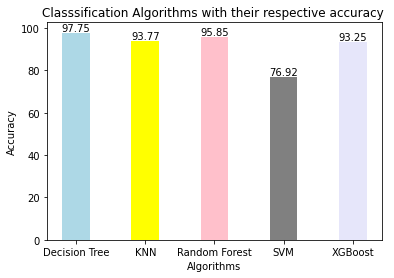

In [ ]:
plt.bar(algos,accuracy, color=['lightblue', 'yellow', 'pink', 'grey', 'lavender'],width= 0.4)
plt.xlabel('Algorithms')
plt.ylabel("Accuracy")
plt.title('Classsification Algorithms with their respective accuracy ')
for i in range(len(algos)):
  plt.text(i,accuracy[i],accuracy[i],ha="center",va="bottom")
plt.show()


# Comparison of classification algorithms with respect to f1 score

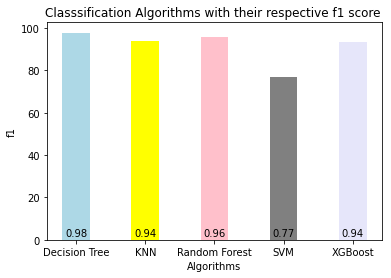

In [ ]:
f1 = [f1_dt,f1_knn,f1_rf,f1_svc,f1_xgb]
plt.bar(algos,accuracy, color=['lightblue', 'yellow', 'pink', 'grey', 'lavender'],width= 0.4)
plt.xlabel('Algorithms')
plt.ylabel("f1")
plt.title('Classsification Algorithms with their respective f1 score ')
for i in range(len(algos)):
  plt.text(i,f1[i],f1[i],ha="center",va="bottom")
plt.show()

 # **Comparison of regressor algorithms with respect to r2 score**

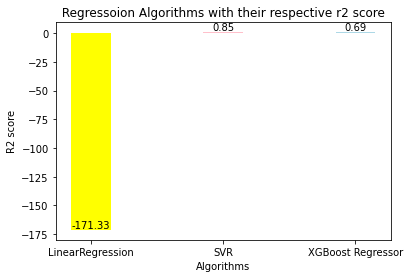

In [ ]:
algos_reg = ['LinearRegression', 'SVR', 'XGBoost Regressor']
r2 = [lin_r2,svr_r2,xgb_r2]
plt.bar(algos_reg,r2 , color=['yellow', 'pink', 'lightblue'],width= 0.3)
plt.xlabel('Algorithms')
plt.ylabel("R2 score")
plt.title(' Regressoion Algorithms with their respective r2 score ')
for i in range(len(algos_reg)):
  plt.text(i,r2[i],r2[i],ha="center",va="bottom")
plt.show()

In [ ]:
results = pd.DataFrame({
 'Model': [ 
 'Random Forest','KNN', 'svc', 
 'xgb','decision tree'
 ],
 'Score': [acc_rf, 
 acc_knn, acc_svmc, acc_xgbc, 
 acc_dtc]})
result_df = results.sort_values(by='Score', ascending=False)
result_df = result_df.set_index('Score')
result_df.head(9)

,Model
Score,
97.75,decision tree
95.85,Random Forest
93.77,KNN
93.25,xgb
76.92,svc


# **RMSE SCORE**

In [ ]:
results = pd.DataFrame({
 'Model': [ 
  'Support Vector Machine(regressor', 
 'XGBoost Regressor','linear regression'
 ],
 'Score': [rmse_svr, 
 rmse_xgbr, rmse_lr]})
result_df = results.sort_values(by='Score', ascending=True)
result_df = result_df.set_index('Score')
result_df.head(9)

,Model
Score,
0.19,Support Vector Machine(regressor
0.28,XGBoost Regressor
6.56,linear regression


#**Mean Absolute Error**

In [ ]:
results = pd.DataFrame({
 'Model': [ 
  'Support Vector Machine(regressor)', 
 'XGBoost Regressor','linear regression'
 ],
 'Score': [mae_svr, 
 mae_xgbr, mae_lr]})
result_df = results.sort_values(by='Score', ascending=True)
result_df = result_df.set_index('Score')
result_df.head(9)

,Model
Score,
0.14,Support Vector Machine(regressor)
0.22,XGBoost Regressor
0.50,linear regression


In [ ]:
results = pd.DataFrame({
 'Model': [ 
 'Random Forest','KNN', 'svc', 
 'xgb','decision tree'
 ],
 'Score': [f1_rf, 
 f1_knn, f1_svc, f1_xgb, 
 f1_dt]})
result_df = results.sort_values(by='Score', ascending=False)
result_df = result_df.set_index('Score')
result_df.head(9)

,Model
Score,
0.98,decision tree
0.96,Random Forest
0.94,KNN
0.94,xgb
0.77,svc
